In [1]:
#inputs,outputs(V)+-0.001:0:0.003,10:0.199,20:0.395,30:0.590,40:0.786,50:0.982,60:1.177,70:1.373,80:1.569,90:1.764,100:1.960,110:2.155,120:2.351,130:2.547,140:2.743,150:2.938,160:3.134,170:3.329,180:3.525,190:3.721,200:3.916,210:4.112,220:4.308,230:4.504,240:4.700,250:4.896,255:4.993
inputs=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,255]
outputs=[0.003,0.199,0.395,0.590,0.786,0.982,1.177,1.373,1.569,1.764,1.960,2.155,2.351,2.547,2.743,2.938,3.134,3.329,3.525,3.721,3.916,4.112,4.308,4.504,4.700,4.896,4.993]

# Calibration (part 1)

V0: 0.0031485193055138527
Slope: 0.019567757481083303
V0 Error: 0.00015017044260384456
Slope Error: 9.929786654116676e-07


Text(0.5, 1.0, 'Calibration Curve')

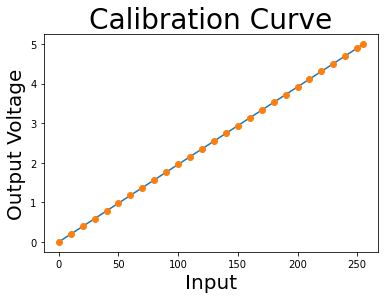

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def cal(x,v0,G):
    return G*x+v0

f,cov=curve_fit(cal,inputs,outputs)
samplex=np.linspace(0,255,1000)

plt.plot(samplex,f[1]*samplex+f[0]) # fit
Voltageerror=(cov[0][0])**0.5
Gerror=(cov[1][1])**0.5

print("V0:", f[0])
print("Slope:", f[1])
print("V0 Error:", Voltageerror)
print("Slope Error:", Gerror)
plt.plot(inputs,outputs, 'o') # data
plt.xlabel('Input', size=20)
plt.ylabel('Output Voltage', size=20)
plt.title('Calibration Curve', size=28)

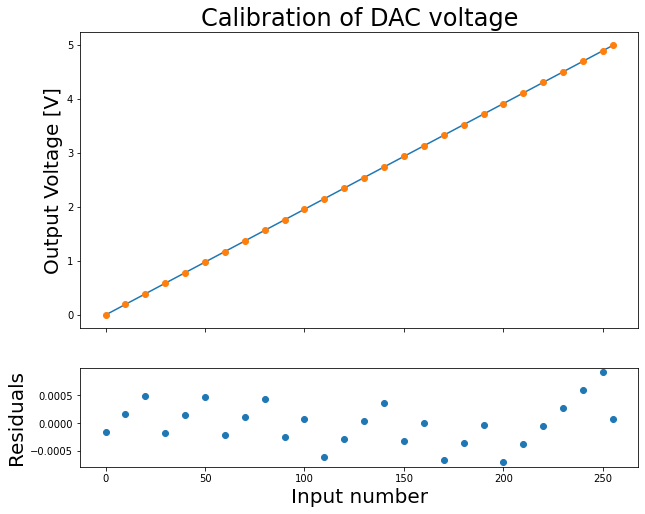

In [3]:
# add the residuals

fig, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
fig.set_size_inches(10,8)
a0.set_title('Calibration of DAC voltage', size=24)
a0.plot(samplex,f[1]*samplex+f[0]) # fit
a0.plot(inputs,outputs, 'o') # data

a1.plot(inputs,outputs-(f[1]*np.array(inputs)+f[0]), 'o') # residuals

a0.set_ylabel('Output Voltage [V]', size=20)
a1.set_xlabel('Input number', size=20)
a1.set_ylabel('Residuals', size=20)
plt.show()

# Test the DAC output values (part 2)

In [9]:
# import data from the csv created in other notebook
data = np.genfromtxt("e1_p2_values.csv", delimiter=",")
in_values = data[:,0]
out_values = data[:,0]/255*5 # convert to volts

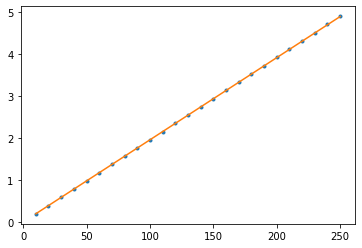

In [10]:
plt.plot(in_values, out_values, ".")
plt.plot(in_values, f[1]*in_values+f[0], "-")

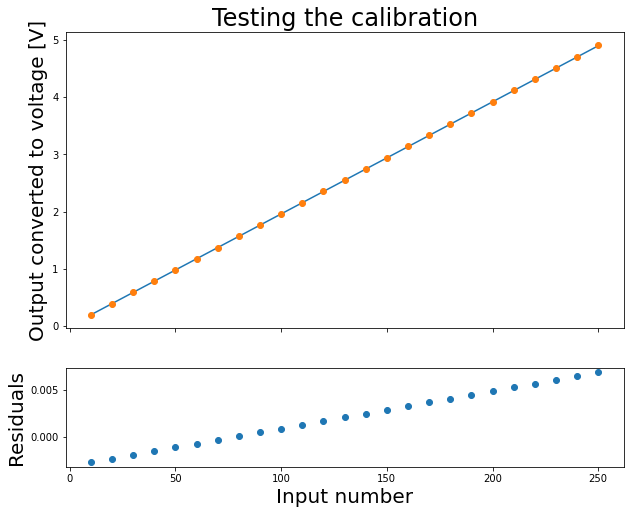

In [14]:
# plot

fig, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
fig.set_size_inches(10,8)
a0.set_title('Testing the calibration', size=24)
a0.plot(in_values, f[1]*in_values+f[0], "-")
a0.plot(in_values, out_values, "o")

a1.plot(in_values, out_values-(f[1]*in_values+f[0]), 'o') # residuals

a0.set_ylabel('Output converted to voltage [V]', size=20)
a1.set_xlabel('Input number', size=20)
a1.set_ylabel('Residuals', size=20)
plt.show()